# LA crime data analysis and modeling by RUIZE XUAN

## Part 0: Introduction
### In this project, I will use spark for big data analysis on LA crime data from 2010 to 2019.
data download: https://data.lacity.org/api/views/63jg-8b9z/rows.csv?accessType=DOWNLOAD  
data source: https://data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z  

The first part of is OLAP for crime data analysis.  
The second part is the time series data analysis.  
At last I will summarize my own work.

## Part 1: Preparation

In [0]:
# Import package

from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
os.environ["PYSPARK_PYTHON"] = "python3"

In [0]:
# check cloud file storage

# import urllib.request
# urllib.request.urlretrieve("https://data.lacity.org/api/views/63jg-8b9z/rows.csv?accessType=DOWNLOAD", "/tmp/LA_crime.csv")
# dbutils.fs.mv("file:/tmp/LA_crime.csv", "dbfs:/Ray/spark_hw1/data/la_10_19.csv")
display(dbutils.fs.ls("dbfs:/Ray/spark_hw1/data/"))

path name size modificationTime dbfs:/Ray/spark_hw1/data/la_10_19.csv la_10_19.csv 540534176 1695590782000

In [0]:
# Create spark session and read data.

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

data_path = "dbfs:/Ray/spark_hw1/data/la_10_19.csv"
df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)
df_opt1 = df_opt1.filter(df_opt1['DATE OCC'].substr(7,4)<'2021')
display(df_opt1)
df_opt1.createOrReplaceTempView("la_crime")

DR_NO Date Rptd DATE OCC TIME OCC AREA AREA NAME Rpt Dist No Part 1-2 Crm Cd Crm Cd Desc Mocodes Vict Age Vict Sex Vict Descent Premis Cd Premis Desc Weapon Used Cd Weapon Desc Status Status Desc Crm Cd 1 Crm Cd 2 Crm Cd 3 Crm Cd 4 LOCATION Cross Street LAT LON 001307355 02/20/2010 12:00:00 AM 02/20/2010 12:00:00 AM 1350 13 Newton 1385 2 900 VIOLATION OF COURT ORDER 0913 1814 2000 48 M H 501 SINGLE FAMILY DWELLING null null AA Adult Arrest 900 null null null 300 E GAGE AV null 33.9825 -118.2695 011401303 09/13/2010 12:00:00 AM 09/12/2010 12:00:00 AM 0045 14 Pacific 1485 2 740 VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0329 0 M W 101 STREET null null IC Invest Cont 740 null null null SEPULVEDA BL MANCHESTER AV 33.9599 -118.3962 070309629 08/09/2010 12:00:00 AM 08/09/2010 12:00:00 AM 1515 13 Newton 1324 2 946 OTHER MISCELLANEOUS CRIME 0344 0 M H 103 ALLEY null null IC Invest Cont 946 null null null 1300 E 21ST ST null 34.0224 -118.2524 090631215 01/05/2010 12:00:00 AM 01/05/2010 12:00:00 AM 0150 06 Hollywood 0646 2 900 VIOLATION OF COURT ORDER 1100 0400 1402 47 F W 101 STREET 102 HAND GUN IC Invest Cont 900 998 null null CAHUENGA BL HOLLYWOOD BL 34.1016 -118.3295 100100501 01/03/2010 12:00:00 AM 01/02/2010 12:00:00 AM 2100 01 Central 0176 1 122 RAPE, ATTEMPTED 0400 47 F H 103 ALLEY 400 STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE) IC Invest Cont 122 null null null 8TH ST SAN PEDRO ST 34.0387 -118.2488 100100506 01/05/2010 12:00:00 AM 01/04/2010 12:00:00 AM 1650 01 Central 0162 1 442 SHOPLIFTING - PETTY THEFT ($950 & UNDER) 0344 1402 23 M B 404 DEPARTMENT STORE null null AA Adult Arrest 442 null null null 700 W 7TH ST null 34.048 -118.2577 100100508 01/08/2010 12:00:00 AM 01/07/2010 12:00:00 AM 2005 01 Central 0182 1 330 BURGLARY FROM VEHICLE 0344 46 M H 101 STREET null null IC Invest Cont 330 null null null PICO BL GRAND AV 34.0389 -118.2643 100100509 01/09/2010 12:00:00 AM 01/08/2010 12:00:00 AM 2100 01 Central 0157 1 230 ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT 0416 51 M B 710 OTHER PREMISE 500 UNKNOWN WEAPON/OTHER WEAPON AA Adult Arrest 230 null null null 500 CROCKER ST null 34.0435 -118.2427 100100510 01/09/2010 12:00:00 AM 01/09/2010 12:00:00 AM 0230 01 Central 0171 1 230 ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT 0400 0416 30 M H 108 PARKING LOT 400 STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE) IC Invest Cont 230 null null null 800 W OLYMPIC BL null 34.045 -118.264 100100511 01/09/2010 12:00:00 AM 01/06/2010 12:00:00 AM 2100 01 Central 0132 1 341 THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD 0344 1402 55 M W 710 OTHER PREMISE null null IC Invest Cont 341 998 null null 200 S OLIVE ST null 34.0538 -118.2488 100100521 01/14/2010 12:00:00 AM 01/14/2010 12:00:00 AM 1445 01 Central 0118 2 624 BATTERY - SIMPLE ASSAULT 0400 0429 2000 38 F B 101 STREET 400 STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE) IC Invest Cont 624 null null null 900 N BROADWAY null 34.064 -118.2375 100100522 01/15/2010 12:00:00 AM 01/14/2010 12:00:00 AM 2000 01 Central 0158 1 210 ROBBERY 0344 40 M H 101 STREET 400 STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE) AO Adult Other 210 null null null ALAMEDA ST 7TH ST 34.035 -118.2386 100100523 01/15/2010 12:00:00 AM 01/15/2010 12:00:00 AM 0245 01 Central 0182 2 740 VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0329 24 F W 102 SIDEWALK null null AA Adult Arrest 740 null null null 1100 S OLIVE ST null 34.0409 -118.2609 100100529 01/16/2010 12:00:00 AM 01/15/2010 12:00:00 AM 1745 01 Central 0152 2 755 BOMB SCARE 0404 29 F B 738 LIBRARY 500 UNKNOWN WEAPON/OTHER WEAPON IC Invest Cont 755 null null null 600 W 5TH ST null 34.0502 -118.254 100100531 01/16/2010 12:00:00 AM 01/15/2010 12:00:00 AM 2030 01 Central 0127 1 210 ROBBERY 0344 0416 1218 47 M A 102 SIDEWALK 400 STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE) IC Invest Cont 210 null null null 1ST LOS ANGELES 34.0515 -118.2424 100100535 01/17/2010 12:00:00 AM 01/16/2010 12:00:00 AM 1735 01 Central 0185 2 946 OTHER MISCELLAN

Columns in this dataset:

DR_NO - Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits

Date Rptd	- MM/DD/YYYY

DATE OCC - MM/DD/YYYY

TIME OCC - In 24 hour military time.

AREA - The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.

AREA NAME - The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.

Rpt Dist No - A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74a4b4db1_4

Part 1-2

Crm Cd - Indicates the crime committed. (Same as Crime Code 1)

Crm Cd Desc - Defines the Crime Code provided

Mocodes - Modus Operandi: Activities associated with the suspect in commission of the crime.See attached PDF for list of MO Codes in numerical order. https://data.lacity.org/api/views/y8tr-7khq/files/3a967fbd-f210-4857-bc52-60230efe256c?download=true&filename=MO%20CODES%20(numerical%20order)

Vict Age - Two character numeric

Vict Sex - F - Female M - Male X - Unknown

Vict Descent - Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

Premis Cd - The type of structure, vehicle, or location where the crime took place.

Premis Desc - Defines the Premise Code provided.

Weapon Used Cd - The type of weapon used in the crime.

Weapon Desc - Defines the Weapon Used Code provided.

Status - Status of the case. (IC is the default)

Status Desc - Defines the Status Code provided.

Crm Cd 1 - Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.

Crm Cd 2 - May contain a code for an additional crime, less serious than Crime Code 1.

Crm Cd 3 - May contain a code for an additional crime, less serious than Crime Code 1.

Crm Cd 4 - May contain a code for an additional crime, less serious than Crime Code 1.

LOCATION - Street address of crime incident rounded to the nearest hundred block to maintain anonymity.

Cross Street - Cross Street of rounded Address

LAT - Latitude

LON - Longtitude

## Part 2: Problem solving

Here we can use Spark dataframe or Spark SQL for data analysis. I will choose both.

#### 1. Count the number of crimes for different areas.

In [0]:
# sql way
spark_sql_q1 = spark.sql('''SELECT `AREA NAME`, count(*) COUNT
                            From la_crime 
                            GROUP BY 1
                            ORDER BY 2 DESC
                        ''')
display(spark_sql_q1)

AREA NAME COUNT 77th Street 145287 Southwest 135347 N Hollywood 113725 Pacific 112309 Southeast 111477 Mission 100498 Northeast 100166 Newton 99999 Van Nuys 99582 Hollywood 98933 Central 98212 Devonshire 96336 Harbor 91909 Rampart 89592 West Valley 89532 Topanga 89145 West LA 88899 Wilshire 88510 Olympic 86495 Foothill 79821 Hollenbeck 77926

In [0]:
# df way
spark_df_q1 = df_opt1.groupBy('AREA NAME').count().orderBy('count', ascending = False)
display(spark_df_q1)

AREA NAME count 77th Street 145287 Southwest 135347 N Hollywood 113725 Pacific 112309 Southeast 111477 Mission 100498 Northeast 100166 Newton 99999 Van Nuys 99582 Hollywood 98933 Central 98212 Devonshire 96336 Harbor 91909 Rampart 89592 West Valley 89532 Topanga 89145 West LA 88899 Wilshire 88510 Olympic 86495 Foothill 79821 Hollenbeck 77926

<Figure size 5760x2880 with 0 Axes>

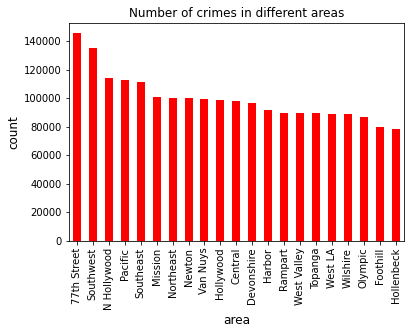

In [0]:
# Convert Spark dataframe to Pandas dataframe before visualization.
crimes_pd_df = spark_df_q1.toPandas()
plt.figure(figsize=(80, 40))
ax = crimes_pd_df.plot(kind = 'bar',x = 'AREA NAME',y = 'count',logy= False,color = 'red',legend = False, align = 'center')
ax.set_ylabel('count',fontsize = 12)
ax.set_xlabel('area',fontsize = 12)
plt.xticks(fontsize=10, rotation=90)
plt.title('Number of crimes in different areas')
display()

Q1 Summary: Based on the result above, we can basically get the top-2 dangerous district, namely 77th Street, Southwest.

#### 2. Count the number of crimes for different categories.

In [0]:
# sql way
spark_sql_q2 = spark.sql('''SELECT `Crm Cd Desc`, count(*) COUNT
                            From la_crime 
                            GROUP BY 1
                            ORDER BY 2 DESC
                        ''')
display(spark_sql_q2)

Crm Cd Desc COUNT BATTERY - SIMPLE ASSAULT 188362 BURGLARY FROM VEHICLE 160730 VEHICLE - STOLEN 158531 THEFT PLAIN - PETTY ($950 & UNDER) 148099 BURGLARY 145830 THEFT OF IDENTITY 125900 INTIMATE PARTNER - SIMPLE ASSAULT 113128 VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 108244 ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT 91939 VANDALISM - MISDEAMEANOR ($399 OR UNDER) 89519 THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER) 87517 ROBBERY 83142 THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD 73641 CRIMINAL THREATS - NO WEAPON DISPLAYED 55953 SHOPLIFTING - PETTY THEFT ($950 & UNDER) 47402 THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER) 31320 DOCUMENT FORGERY / STOLEN FELONY 22278 TRESPASSING 21374 LETTERS, LEWD - TELEPHONE CALLS, LEWD 20954 OTHER MISCELLANEOUS CRIME 20445 VIOLATION OF COURT ORDER 19851 VIOLATION OF RESTRAINING ORDER 19069 BRANDISH WEAPON 15402 INTIMATE PARTNER - AGGRAVATED ASSAULT 15390 THEFT, PERSON 14635 BIKE - STOLEN 14206 BURGLARY, ATTEMPTED 12403 ATTEMPTED ROBBERY 11880 BATTERY WITH SEXUAL CONTACT 11286 RAPE, FORCIBLE 10491 CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT 9216 CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER) 9039 BUNCO, GRAND THEFT 8964 EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER) 7870 BUNCO, PETTY THEFT 5314 CHILD NEGLECT (SEE 300 W.I.C.) 5177 CHILD ANNOYING (17YRS & UNDER) 5103 BATTERY POLICE (SIMPLE) 4822 SHOPLIFTING-GRAND THEFT ($950.01 & OVER) 4633 SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ 4236 OTHER ASSAULT 4055 CONTEMPT OF COURT 3832 DISCHARGE FIREARMS/SHOTS FIRED 3772 DISTURBING THE PEACE 3658 ARSON 3509 INDECENT EXPOSURE 3494 VEHICLE - ATTEMPT STOLEN 3331 RESISTING ARREST 3234 THREATENING PHONE CALLS/LETTERS 3058 SEXUAL PENETRATION W/FOREIGN OBJECT 2861 BURGLARY FROM VEHICLE, ATTEMPTED 2820 CRIMINAL HOMICIDE 2762 EXTORTION 2593 SHOTS FIRED AT INHABITED DWELLING 2528 DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER 2115 KIDNAPPING 1989 ORAL COPULATION 1965 STALKING 1815 CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT 1672 SEX OFFENDER REGISTRANT OUT OF COMPLIANCE 1660 THEFT PLAIN - ATTEMPT 1647 THROWING OBJECT AT MOVING VEHICLE 1638 ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER 1590 SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH 1550 UNAUTHORIZED COMPUTER ACCESS 1450 VIOLATION OF TEMPORARY RESTRAINING ORDER 1439 LEWD CONDUCT 1382 CRUELTY TO ANIMALS 1251 THEFT FROM MOTOR VEHICLE - ATTEMPT 1225 BOMB SCARE 1179 PURSE SNATCHING 1169 PEEPING TOM 1159 CHILD STEALING 1101 RAPE, ATTEMPTED 1097 PICKPOCKET 1001 FALSE IMPRISONMENT 939 PROWLER 935 COUNTERFEIT 825 CREDIT CARDS, FRAUD USE ($950.01 & OVER) 768 BUNCO, ATTEMPT 748 KIDNAPPING - GRAND ATTEMPT 713 EMBEZZLEMENT, PETTY THEFT ($950 & UNDER) 581 FAILURE TO YIELD 519 ILLEGAL DUMPING 504 HUMAN TRAFFICKING - COMMERCIAL SEX ACTS 489 DRIVING WITHOUT OWNER CONSENT (DWOC) 472 PIMPING 464 FALSE POLICE REPORT 396 DOCUMENT WORTHLESS ($200.01 & OVER) 340 PANDERING 330 BATTERY ON A FIREFIGHTER 316 CREDIT CARDS, FRAUD USE ($950 & UNDER 300 SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT 294 THEFT FROM PERSON - ATTEMPT 290 BOAT - STOLEN 276 RECKLESS DRIVING 264 LEWD/LASCIVIOUS ACTS WITH CHILD 254 SHOPLIFTING - ATTEMPT 241 DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01 235 THEFT, COIN MACHINE - PETTY ($950 & UNDER) 231 CHILD PORNOGRAPHY 227 CONTRIBUTING 182 WEAPONS POSSESSION/BOMBING 175 DISHONEST EMPLOYEE - GRAND THEFT 162 DISHONEST EMPLOYEE - PETTY THEFT 131 CHILD ABANDONMENT 103 HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE 101 TILL TAP - PETTY ($950 & UNDER) 93 GRAND THEFT / INSURANCE FRAUD 71 VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC) 61 DOCUMENT WORTHLESS ($200 & UNDER) 59 CONSPIRACY 55 DRUGS, TO A MINOR 48 PURSE SNATCHING - ATTEMPT 47 THEFT, COIN MACHINE - GRAND ($950.01 & OVER) 46 LYNCHING 45 DISRUPT SCHOOL 44 BIKE - ATTEMPTED STOLEN 39 DRUNK ROLL 37 TELEPHONE PROPERTY - DAMAGE 37 BRIBERY 32 REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE) 30 THEFT, COIN MACHINE - ATTEMPT 26 BEAS

In [0]:
# df way
spark_df_q2 = df_opt1.groupBy('Crm Cd Desc').count().orderBy('count', ascending = False)
display(spark_df_q2)

Crm Cd Desc count BATTERY - SIMPLE ASSAULT 188362 BURGLARY FROM VEHICLE 160730 VEHICLE - STOLEN 158531 THEFT PLAIN - PETTY ($950 & UNDER) 148099 BURGLARY 145830 THEFT OF IDENTITY 125900 INTIMATE PARTNER - SIMPLE ASSAULT 113128 VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 108244 ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT 91939 VANDALISM - MISDEAMEANOR ($399 OR UNDER) 89519 THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER) 87517 ROBBERY 83142 THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD 73641 CRIMINAL THREATS - NO WEAPON DISPLAYED 55953 SHOPLIFTING - PETTY THEFT ($950 & UNDER) 47402 THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER) 31320 DOCUMENT FORGERY / STOLEN FELONY 22278 TRESPASSING 21374 LETTERS, LEWD - TELEPHONE CALLS, LEWD 20954 OTHER MISCELLANEOUS CRIME 20445 VIOLATION OF COURT ORDER 19851 VIOLATION OF RESTRAINING ORDER 19069 BRANDISH WEAPON 15402 INTIMATE PARTNER - AGGRAVATED ASSAULT 15390 THEFT, PERSON 14635 BIKE - STOLEN 14206 BURGLARY, ATTEMPTED 12403 ATTEMPTED ROBBERY 11880 BATTERY WITH SEXUAL CONTACT 11286 RAPE, FORCIBLE 10491 CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT 9216 CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER) 9039 BUNCO, GRAND THEFT 8964 EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER) 7870 BUNCO, PETTY THEFT 5314 CHILD NEGLECT (SEE 300 W.I.C.) 5177 CHILD ANNOYING (17YRS & UNDER) 5103 BATTERY POLICE (SIMPLE) 4822 SHOPLIFTING-GRAND THEFT ($950.01 & OVER) 4633 SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ 4236 OTHER ASSAULT 4055 CONTEMPT OF COURT 3832 DISCHARGE FIREARMS/SHOTS FIRED 3772 DISTURBING THE PEACE 3658 ARSON 3509 INDECENT EXPOSURE 3494 VEHICLE - ATTEMPT STOLEN 3331 RESISTING ARREST 3234 THREATENING PHONE CALLS/LETTERS 3058 SEXUAL PENETRATION W/FOREIGN OBJECT 2861 BURGLARY FROM VEHICLE, ATTEMPTED 2820 CRIMINAL HOMICIDE 2762 EXTORTION 2593 SHOTS FIRED AT INHABITED DWELLING 2528 DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER 2115 KIDNAPPING 1989 ORAL COPULATION 1965 STALKING 1815 CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT 1672 SEX OFFENDER REGISTRANT OUT OF COMPLIANCE 1660 THEFT PLAIN - ATTEMPT 1647 THROWING OBJECT AT MOVING VEHICLE 1638 ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER 1590 SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH 1550 UNAUTHORIZED COMPUTER ACCESS 1450 VIOLATION OF TEMPORARY RESTRAINING ORDER 1439 LEWD CONDUCT 1382 CRUELTY TO ANIMALS 1251 THEFT FROM MOTOR VEHICLE - ATTEMPT 1225 BOMB SCARE 1179 PURSE SNATCHING 1169 PEEPING TOM 1159 CHILD STEALING 1101 RAPE, ATTEMPTED 1097 PICKPOCKET 1001 FALSE IMPRISONMENT 939 PROWLER 935 COUNTERFEIT 825 CREDIT CARDS, FRAUD USE ($950.01 & OVER) 768 BUNCO, ATTEMPT 748 KIDNAPPING - GRAND ATTEMPT 713 EMBEZZLEMENT, PETTY THEFT ($950 & UNDER) 581 FAILURE TO YIELD 519 ILLEGAL DUMPING 504 HUMAN TRAFFICKING - COMMERCIAL SEX ACTS 489 DRIVING WITHOUT OWNER CONSENT (DWOC) 472 PIMPING 464 FALSE POLICE REPORT 396 DOCUMENT WORTHLESS ($200.01 & OVER) 340 PANDERING 330 BATTERY ON A FIREFIGHTER 316 CREDIT CARDS, FRAUD USE ($950 & UNDER 300 SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT 294 THEFT FROM PERSON - ATTEMPT 290 BOAT - STOLEN 276 RECKLESS DRIVING 264 LEWD/LASCIVIOUS ACTS WITH CHILD 254 SHOPLIFTING - ATTEMPT 241 DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01 235 THEFT, COIN MACHINE - PETTY ($950 & UNDER) 231 CHILD PORNOGRAPHY 227 CONTRIBUTING 182 WEAPONS POSSESSION/BOMBING 175 DISHONEST EMPLOYEE - GRAND THEFT 162 DISHONEST EMPLOYEE - PETTY THEFT 131 CHILD ABANDONMENT 103 HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE 101 TILL TAP - PETTY ($950 & UNDER) 93 GRAND THEFT / INSURANCE FRAUD 71 VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC) 61 DOCUMENT WORTHLESS ($200 & UNDER) 59 CONSPIRACY 55 DRUGS, TO A MINOR 48 PURSE SNATCHING - ATTEMPT 47 THEFT, COIN MACHINE - GRAND ($950.01 & OVER) 46 LYNCHING 45 DISRUPT SCHOOL 44 BIKE - ATTEMPTED STOLEN 39 DRUNK ROLL 37 TELEPHONE PROPERTY - DAMAGE 37 BRIBERY 32 REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE) 30 THEFT, COIN MACHINE - ATTEMPT 26 BEAS

In [0]:
# Pick the first 20 crime categories for data analysis.
fig_dims = (20,6)
fig = plt.subplots(figsize=fig_dims)
spark_df_q2_plot = spark_df_q2.toPandas()
chart = sns.barplot(x = 'Crm Cd Desc', y = 'count', palette= 'rocket',data = spark_df_q2_plot.iloc[0:19] )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
# BuGn_r

Out[28]: [Text(0, 0, 'BATTERY - SIMPLE ASSAULT'),
 Text(1, 0, 'BURGLARY FROM VEHICLE'),
 Text(2, 0, 'VEHICLE - STOLEN'),
 Text(3, 0, 'THEFT PLAIN - PETTY ($950 & UNDER)'),
 Text(4, 0, 'BURGLARY'),
 Text(5, 0, 'THEFT OF IDENTITY'),
 Text(6, 0, 'INTIMATE PARTNER - SIMPLE ASSAULT'),
 Text(7, 0, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)'),
 Text(8, 0, 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT'),
 Text(9, 0, 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)'),
 Text(10, 0, 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)'),
 Text(11, 0, 'ROBBERY'),
 Text(12, 0, 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD'),
 Text(13, 0, 'CRIMINAL THREATS - NO WEAPON DISPLAYED'),
 Text(14, 0, 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)'),
 Text(15, 0, 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)'),
 Text(16, 0, 'DOCUMENT FORGERY / STOLEN FELONY'),
 Text(17, 0, 'TRESPASSING'),
 Text(18, 0, 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD')]

Each Mocode corresponds to an activity associated with the suspect. Mocodes source: https://data.lacity.org/api/views/63jg-8b9z/files/e14442b9-a6b8-4531-83f3-f7ba980b1377?download=true&filename=MO_CODES_Numerical_20191119.pdf

In [0]:
# sql way
spark_sql_q2_1 = spark.sql('''SELECT `Mocodes`, count(*) COUNT
                            From la_crime 
                            GROUP BY 1
                            ORDER BY 2 DESC
                            LIMIT 50
                        ''')
display(spark_sql_q2_1)

Mocodes COUNT null 226003 0344 209548 0329 88085 1501 42435 0416 28921 0325 26447 0329 1300 18035 1822 17967 0344 1300 13551 0400 12088 0377 12043 0344 1606 11482 0344 1609 10004 0329 1307 9613 0930 1822 9436 0344 1607 8290 0344 1307 7590 0421 6753 1609 0344 6746 2000 6288 1606 0344 5808 0416 2000 5740 0344 1202 5508 0400 0416 5446 0100 5419 2000 0416 5113 1402 5084 0344 1402 5006 0913 4869 0928 1822 4777 1607 0344 4258 0377 1822 4144 1822 0344 4107 1300 0344 4100 0344 0377 4076 0444 4075 1307 0344 4071 1300 0329 4028 0100 1822 3982 0344 1601 3954 1822 0930 3767 0344 1822 3594 0923 1822 3419 0329 1402 3311 0344 1501 3310 0416 0913 3279 0443 3165 0344 0385 3079 0344 1251 3075 0400 2000 2898

In [0]:
# df way
temp = df_opt1.groupBy('Mocodes').count().orderBy('count', ascending = False).take(50)
display(temp)

Mocodes count null 226003 0344 209548 0329 88085 1501 42435 0416 28921 0325 26447 0329 1300 18035 1822 17967 0344 1300 13551 0400 12088 0377 12043 0344 1606 11482 0344 1609 10004 0329 1307 9613 0930 1822 9436 0344 1607 8290 0344 1307 7590 0421 6753 1609 0344 6746 2000 6288 1606 0344 5808 0416 2000 5740 0344 1202 5508 0400 0416 5446 0100 5419 2000 0416 5113 1402 5084 0344 1402 5006 0913 4869 0928 1822 4777 1607 0344 4258 0377 1822 4144 1822 0344 4107 1300 0344 4100 0344 0377 4076 0444 4075 1307 0344 4071 1300 0329 4028 0100 1822 3982 0344 1601 3954 1822 0930 3767 0344 1822 3594 0923 1822 3419 0329 1402 3311 0344 1501 3310 0416 0913 3279 0443 3165 0344 0385 3079 0344 1251 3075 0400 2000 2898

According to MO_CODES brochure, the most common crimes are related to removing victims property, vandalizing and using weapon. So the insight is that residents should take care of their own properties and being cautious of weapon-used crime. Local police should limit the use of weapons by potential suspects.

In [0]:
temp2 = df_opt1.groupBy('Weapon Desc').count().orderBy('count', ascending = False).take(50)
display(temp2)

Weapon Desc count null 1388765 STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE) 427495 VERBAL THREAT 58068 UNKNOWN WEAPON/OTHER WEAPON 57029 HAND GUN 33867 SEMI-AUTOMATIC PISTOL 12820 KNIFE WITH BLADE 6INCHES OR LESS 12755 OTHER KNIFE 9707 UNKNOWN FIREARM 7873 VEHICLE 7153 REVOLVER 5519 BOTTLE 4989 ROCK/THROWN OBJECT 4553 STICK 4528 CLUB/BAT 4325 FOLDING KNIFE 4226 BLUNT INSTRUMENT 4213 MACE/PEPPER SPRAY 3986 KITCHEN KNIFE 3764 SIMULATED GUN 3523 KNIFE WITH BLADE OVER 6 INCHES IN LENGTH 3328 AIR PISTOL/REVOLVER/RIFLE/BB GUN 2635 BELT FLAILING INSTRUMENT/CHAIN 2573 PIPE/METAL PIPE 2223 OTHER CUTTING INSTRUMENT 2214 PHYSICAL PRESENCE 1753 SCREWDRIVER 1615 HAMMER 1470 UNKNOWN TYPE CUTTING INSTRUMENT 1438 SHOTGUN 1183 MACHETE 1156 SCISSORS 1130 OTHER FIREARM 896 CONCRETE BLOCK/BRICK 882 RIFLE 864 FIXED OBJECT 802 STUN GUN 632 BOARD 566 SWITCH BLADE 565 BOMB THREAT 532 FIRE 497 CAUSTIC CHEMICAL/POISON 478 GLASS 436 BRASS KNUCKLES 417 TIRE IRON 375 AXE 314 DEMAND NOTE 313 TOY GUN 307 SCALDING LIQUID 305 RAZOR BLADE 225

Q2 Summary: Based on the result above, crimes with body force and weapons are the most common.

#### 3. Count the number of crimes hourly and yearly.

In [0]:
#sql way
spark_sql_q3 = spark.sql('''SELECT SUBSTRING(`TIME OCC`,1,2) Hour, count(*) COUNT
                            From la_crime 
                            GROUP BY 1
                            ORDER BY 2 DESC
                        ''')
display(spark_sql_q3)

Hour COUNT 12 166513 18 124817 20 120622 19 118279 17 116788 21 112410 15 108841 22 108388 16 108024 14 100514 23 95531 13 90818 10 89329 08 88023 00 87117 11 84950 09 78870 01 59773 07 53121 02 50763 03 38085 06 36539 04 29012 05 26573

In [0]:
# df way
spark_df_q3 = df_opt1.groupBy(df_opt1['TIME OCC'].substr(1, 2).alias("hour")).count().orderBy('count', ascending = False)
display(spark_df_q3)

hour count 12 166513 18 124817 20 120622 19 118279 17 116788 21 112410 15 108841 22 108388 16 108024 14 100514 23 95531 13 90818 10 89329 08 88023 00 87117 11 84950 09 78870 01 59773 07 53121 02 50763 03 38085 06 36539 04 29012 05 26573

Out[34]: Text(0.5, 0, 'hour')

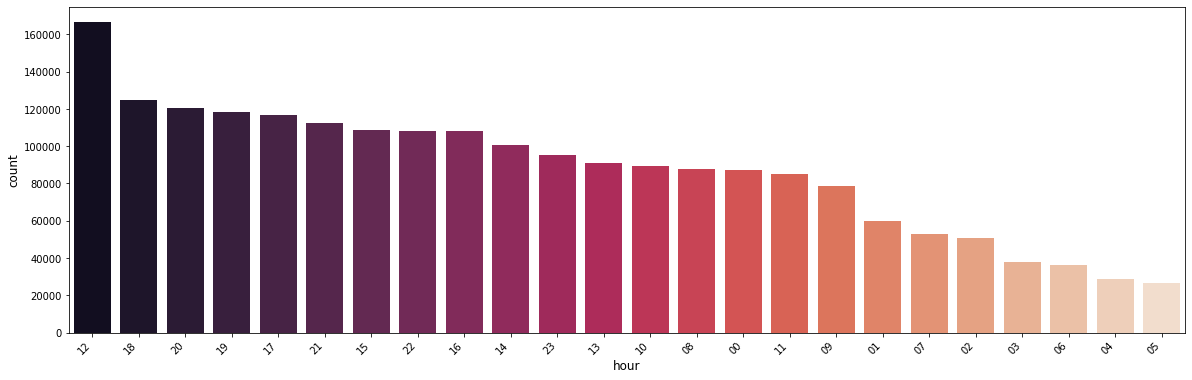

In [0]:
fig_dims = (20,6)
fig = plt.subplots(figsize=fig_dims)
spark_df_q3_plot = spark_df_q3.toPandas()
chart = sns.barplot(x = 'hour', y = 'count', palette= 'rocket',data = spark_df_q3_plot )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('count',fontsize = 12)
chart.set_xlabel('hour',fontsize = 12)

It can be clearly seen from the above picture that there are two peak periods of crime, 12 o'clock and 18 o'clock. So people should be careful during these periods and police should keep an eye on potential crimes. Visitors may not go out during this time. 

In [0]:
spark_df_q3_3 = df_opt1.groupBy(df_opt1['DATE OCC'].substr(7, 4).alias("year")).count().orderBy('year', ascending = True)
display(spark_df_q3_3)

year count 2010 209292 2011 200884 2012 201769 2013 192808 2014 167400 2015 215844 2016 225869 2017 231606 2018 229575 2019 218653

Out[36]: Text(0.5, 0, 'year')

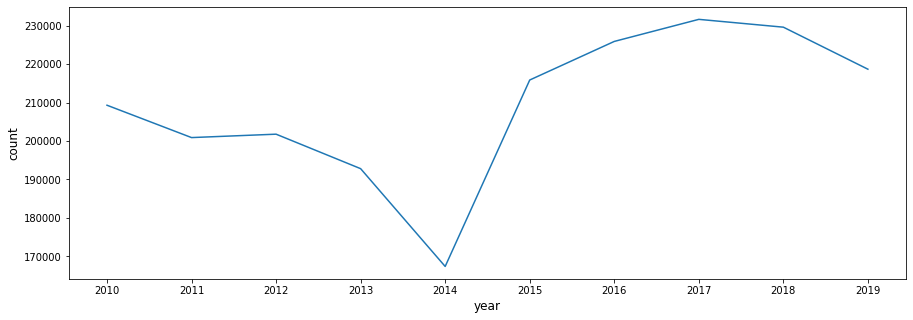

In [0]:
fig_dims = (15,5)
fig = plt.subplots(figsize=fig_dims)
spark_df_q3_plot = spark_df_q3_3.toPandas()
chart = sns.lineplot(x = 'year', y = 'count', palette= 'rocket', data = spark_df_q3_plot )
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('count',fontsize = 12)
chart.set_xlabel('year',fontsize = 12)

There is a huge crime decrease in 2014. This is probably due to Proposition 47 which recategorized some nonviolent offenses as misdemeanors, rather than felonies. After 2014, more crimes happened.

In [0]:
# Top-2 dangerous areas
# sql way
spark_sql_q3_2 = spark.sql('''SELECT SUBSTRING(`TIME OCC`,1,2) Hour, count(*) COUNT
                            From la_crime a
                            WHERE a.`AREA NAME` IN ('77th Street', 'Southwest')
                            GROUP BY 1
                            ORDER BY 2 DESC
                        ''')
display(spark_sql_q3_2)

Hour COUNT 12 21100 20 16216 18 16190 19 15516 17 15266 21 15242 15 15001 16 14598 22 14268 14 14097 13 12769 10 12687 23 12424 11 12382 08 11399 00 10766 09 10737 07 7771 01 7730 02 6454 03 5199 06 5061 04 4064 05 3697

In [0]:
# df way
spark_df_q3_2 = df_opt1.filter(df_opt1['AREA NAME'].isin('77th Street','Southwest')).groupby(df_opt1['TIME OCC'].substr(1, 2).alias("hour")).count().orderBy('count', ascending = False)
display(spark_df_q3_2)

hour count 12 21100 20 16216 18 16190 19 15516 17 15266 21 15242 15 15001 16 14598 22 14268 14 14097 13 12769 10 12687 23 12424 11 12382 08 11399 00 10766 09 10737 07 7771 01 7730 02 6454 03 5199 06 5061 04 4064 05 3697

Q3 Summary: Based on the result above, it can be concluded that crime is highly related to policy. The law's determination of the seriousness of a crime greatly affects the number of crimes committed.

#### 4. Count the number of victims in each category.

Vict Sex

In [0]:
# sql way
spark_sql_q4_1 = spark.sql('''SELECT `Vict Sex`, count(*) COUNT
                            From la_crime a
                            GROUP BY 1
                            ORDER BY 2 DESC
                        ''')
display(spark_sql_q4_1)

Vict Sex COUNT M 963507 F 880219 null 194928 X 54955 H 73 N 17 - 1

In [0]:
#df way
spark_df_q4_1 = df_opt1.groupBy(df_opt1['Vict Sex']).count().orderBy('count', ascending = False)
display(spark_df_q4_1)

Vict Sex count M 963507 F 880219 null 194928 X 54955 H 73 N 17 - 1

Databricks visualization. Run in Databricks to view.

Vict Age

In [0]:
spark_df_q4_2 = df_opt1.filter(df_opt1['Vict Age']>0).groupBy(df_opt1['Vict Age']).count().orderBy('count', ascending = False)
display(spark_df_q4_2)

Vict Age count 25 47548 26 47031 27 46511 24 46157 28 45983 29 45448 23 44716 30 44671 31 42640 22 41406 32 41395 35 40726 33 40437 34 39874 21 37808 36 37225 37 35582 38 34832 40 34602 39 34164 20 33737 41 32693 42 31802 43 31319 44 31092 45 30919 46 30730 47 30453 50 30425 48 29874 49 28795 19 28427 51 27565 52 26724 53 25758 54 24831 55 23776 18 23509 56 22791 57 21310 58 19849 59 18893 60 17629 17 17265 61 15970 16 15021 62 14810 15 13734 63 13647 64 12515 14 11800 65 11438 66 10396 13 9569 67 9360 68 8330 69 7920 12 7163 70 7053 71 6253 72 5674 11 5381 73 4817 74 4479 75 4343 10 3933 76 3795 77 3466 9 3379 78 3206 79 2930 8 2763 80 2718 7 2663 6 2608 5 2510 81 2377 4 2180 82 2133 83 1940 3 1823 84 1761 85 1513 2 1478 86 1391 87 1178 88 1099 89 906 99 804 90 783 91 641 92 492 93 446 94 325 95 242 96 190 97 168 98 114 118 1

Databricks visualization. Run in Databricks to view.

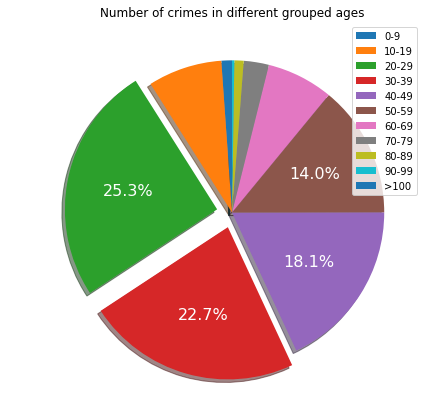

In [0]:
# Grouped into ten's age and visualize it.
spark_df_q4_2_1 = df_opt1.toPandas()
spark_df_q4_2_1['intage'] = spark_df_q4_2_1['Vict Age'].astype(int)
res = spark_df_q4_2_1[spark_df_q4_2_1['intage']>0].loc[:,'intage'].groupby(spark_df_q4_2_1['intage']//10*10).count()

def my_autopct(pct):
	return ('%1.1f%%' % pct) if pct > 10 else ''
plt.figure(figsize=(7, 7))
explode = (0, 0, 0.1, 0.1, 0, 0, 0, 0, 0, 0 , 0)
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','>100']
plt.pie(res, explode = explode, labels = labels, autopct=my_autopct, shadow = True, startangle = 90, textprops={'fontsize': 16, 'color': 'w'})
# ax = crimes_pd_df.plot(kind = 'bar',x = 'AREA NAME',y = 'count',logy= False,color = 'red',legend = False, align = 'center')
# ax.set_ylabel('count',fontsize = 12)
# ax.set_xlabel('area',fontsize = 12)
# plt.xticks(fontsize=10, rotation=90)
plt.title('Number of crimes in different grouped ages')
plt.legend(loc='upper right')
display()

We can learn from the above figure that most victims are under ages between 20 - 40 (which accounts for approxiamtely 50% of total victims). So people among this group should be more careful than others when going out.

Vict Descent

In [0]:
spark_df_q4_3 = df_opt1.groupBy(df_opt1['Vict Descent']).count().orderBy('count', ascending = False)
display(spark_df_q4_3)

Vict Descent count H 718068 W 505134 B 333435 O 200117 null 194973 X 77416 A 50140 K 8407 F 2541 C 1068 I 944 J 414 P 345 V 213 U 184 Z 139 G 84 S 32 D 24 L 19 - 3

From the above piechart, we can clearly see that Hispanic/Latin/Mexican, White and Black are the three most groups that may fall victim to a crime. So maybe local police should place more emphasis on these people to protect them.

#### 5. For different category of crime, find the percentage of resolution

In [0]:
spark_df_q5 = df_opt1.groupBy(df_opt1['Status Desc']).count().orderBy('count', ascending = False)
spark_df_q5.display()

Status Desc count Invest Cont 1604839 Adult Other 250209 Adult Arrest 217651 Juv Arrest 15653 Juv Other 5313 UNK 35

Databricks visualization. Run in Databricks to view.

In [0]:
spark_df_q5_2 = df_opt1.filter(df_opt1['AREA NAME']. isin('77th Street','Southwest')).groupBy(df_opt1['Status Desc']).count().orderBy('count', ascending = False)
spark_df_q5_2.display()

Status Desc count Invest Cont 218060 Adult Other 34317 Adult Arrest 24652 Juv Arrest 2796 Juv Other 796 UNK 13

Databricks visualization. Run in Databricks to view.

Q5 Summary: Most of the crimes remain unsolved.

## Part 3: Time series analysis

In [0]:
df = df_opt1.groupBy(df_opt1['DATE OCC'].alias('date')).count().orderBy('DATE OCC', ascending = True).toPandas()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by = 'date')
df.reset_index(inplace=True, drop=True)
df.set_index(['date'], inplace=True)
df = df[:3300]
df
# spark_df_q3_plot_2.sort_values('day',inplace=True)

count 
 
 
 date 
 
 
 
 
 
 2010-01-01 
 2342 
 
 
 2010-01-02 
 535 
 
 
 2010-01-03 
 539 
 
 
 2010-01-04 
 558 
 
 
 2010-01-05 
 548 
 
 
 ... 
 ... 
 
 
 2019-01-09 
 584 
 
 
 2019-01-10 
 610 
 
 
 2019-01-11 
 606 
 
 
 2019-01-12 
 582 
 
 
 2019-01-13 
 561 
 
 
 
 3300 rows × 1 columns

Out[47]: <AxesSubplot:xlabel='date'>

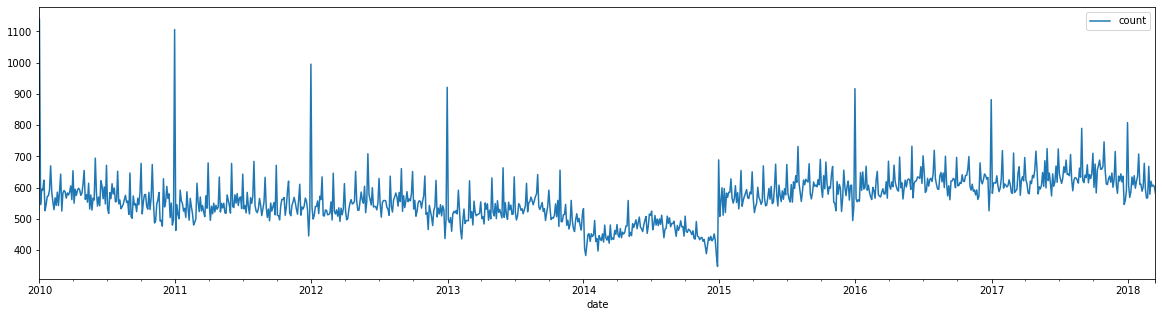

In [0]:
y = df.resample('3D').mean().iloc[:1000]
y.plot(figsize=(20, 5))

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(df, column_name):
    # result_mul = seasonal_decompose(df[column_name], model='multiplicative', extrapolate_trend = 'freq',period=120)
    result_add = seasonal_decompose(df[column_name], model = 'additive', extrapolate_trend='freq',period=180)

    plt.rcParams.update({'figure.figsize': (20,8)})
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
    # result_mul.plot().suptitle('Multiplicative Decompose', fontsize=30)
    result_add.plot()
    # suptitle('Additive Decompose', fontsize=10)

    plt.show()

    return result_add

result_add = decompose(y, 'count')

<Figure size 1440x576 with 0 Axes>

In [0]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df, order=(2, 2, 2))
results = mod.fit()
results.plot_diagnostics(figsize=(15, 10))
plt.show()

/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<Figure size 1440x720 with 0 Axes>

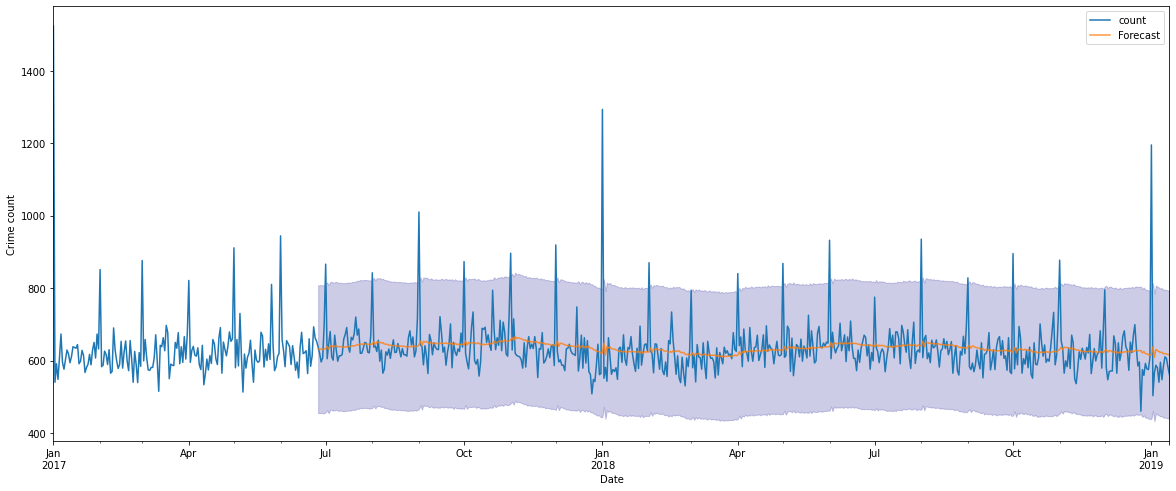

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2017-06-26'), dynamic=False)
pred_ci = pred.conf_int()
# Construct confidence interval for the fitted parameters.

plt.figure(figsize=(20,10))
ax = df['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.8)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='darkblue', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Crime count')
plt.legend()

plt.show()

In [0]:
y_forecasted = pred.predicted_mean
y_truth = df.loc['2017-06-26':,'count']

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4898.32


In [0]:
pred = results.get_prediction(start=pd.to_datetime('2017-06-26'), dynamic=True)
pred_ci = pred.conf_int()
# Construct confidence interval for the fitted parameters.

plt.figure(figsize=(20,10))
ax = df['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.8)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='darkblue', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Crime count')
plt.legend()

plt.show()

<Figure size 1440x720 with 0 Axes>

In [0]:
y_forecasted = pred.predicted_mean
y_truth = df.loc['2017-06-26':,'count']

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 5264.36


## Part 4: Summary

In this project, I used the crime data in LA from 2010-2019 (more than 213,000) for big data exploration and analysis. The main goal of this project is to find the underlying crime pattern based on real data to gain insights from it, which can help improve the efficiency of police enforcement. I used Spark dataframe and SparkSQL to solve different OLAP issues. In the meantime, I used different visualization methods to clearly illustrate my points.

Below are some insights from my project and there are many aspects to concern about. 

1. Police should place more emphasis on "dangerous" areas such as 77th Street, Southwest since crimes in these places are more common. As for the activity associated with suspect, most of the criminals focus on residents' properties and cause huge damage to them. Specifally, criminals would use weapon towards their goal. So for residents there is a need to be careful about their ownings. Governments and police should restrict the use of weapons nationally. Also, more powerful law should be made to prevent serious crimes.

2. Residents should be aware of goint out on 12PM or 18PM. They are the most probable time that a crime can happen. I also suggest visitors or tourists better not to go out during these time in case of a crime.

3. Special groups of people can be more easily fall victim to a crime. For example, people aged between 20-40 or people belong to Hispanic/Latin/Mexican. So these groups of people should be aware of such situations.

4. Surprisingly, from 2010 to 2019 most of the crimes haven't been resolved and require further investigation. 

I learned a lot of tools and skills in the project. First I learned how to use databricks with spark frame to analyze large amounts of data. I grasped the basics of distributed system with data storage and data computation. I explored the PySpark - SQL basics.